# Likelihood(MLE와 MAP)

# 확률 변수로서의 모델 파라미터

(a,b)가 위치하는 곳 R**2공간을 파라미터 공간(parameter space)라고 부른다

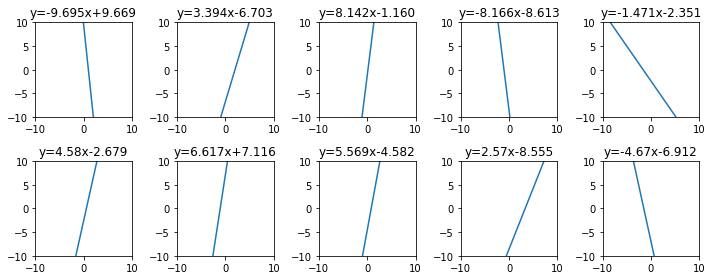

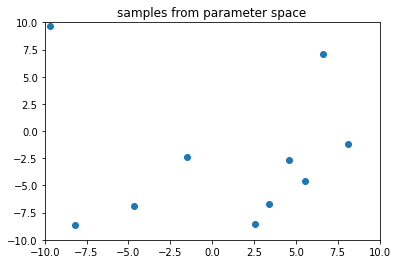

In [1]:
# -10,10 시각화
import numpy as np
import matplotlib.pyplot as plt

parameter_points = []
fig1, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.uniform: 정해진 구간에서 수를 무작위로 추출하여 반환합니다.
    a, b = np.random.uniform(-10, 10, size=2)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

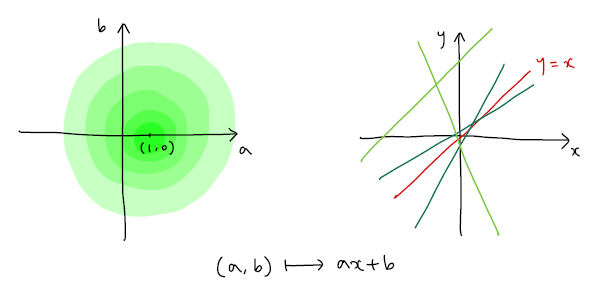

위 그림에서 파라미터 공간에 주어진 확률 분포는 평균이 (1,0)인 정규분포이므로 y = ax + b에서 a와 b의 값이 각 각 1과 0에 가까울 확률, 그러니까 모델이 y=x에 가까울 확률이 크다.

왼쪽의 파라미터 공간에서 원소 하나를 뽑은 다음 일차함수의 그래프를 그렸을 때, 모델의 형태가 오른쪽의 진한 초록색 직선들과 비슷할 확률이 클 것이고, 연두색 직선들처럼 기울기나 y절편 차이가 많이 날 확률은 작다.



# psterior와 prior, likelihood 사이의 관계

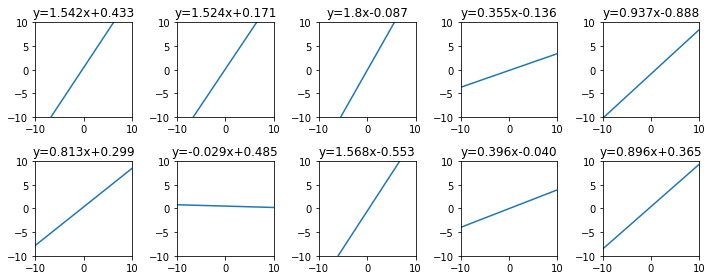

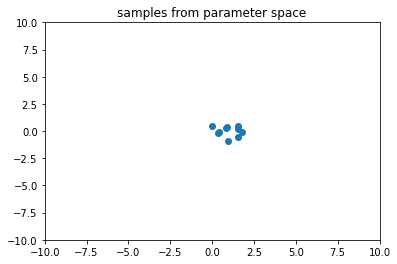

In [2]:
# 평균이 (1,0)이고 표준편차가 0.5인 정규분포에서 10개의 점을 무작위로 뽑은 다음 일차함수 그래프 그려주기

parameter_points = []
fig, axes1 = plt.subplots(2, 5, figsize=(10, 4))

for ax in axes1.flatten():
    # np.random.normal: 정규분포를 따르는 확률 변수의 랜덤한 값을 반환합니다.
    a, b = np.random.normal(loc=[1, 0], scale=0.5)
    a = round(a, 3)
    b = round(b, 3)
    parameter_points.append((a, b))

    x = np.linspace(-10, 10, 50)
    y = a*x + b
    ax.plot(x, y)

    ax.set_title('y='+str(a)+'x'+'{0:+.03f}'.format(b))
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)

plt.tight_layout()

px, py = np.split(np.array(parameter_points), 2, axis=1)
fig2 = plt.figure()
axes2 = plt.gca()

axes2.set_title('samples from parameter space')
axes2.set_xlim(-10, 10)
axes2.set_ylim(-10, 10)

plt.scatter(px, py)
plt.show()

위 쪽의 예제와 비교하면 파라미터 공간에서 추출된 샘플들이 (1,0) 주위에 모여있고, 결과 그래프들의 차이가 작은 것을 확인할 수 있다.

데이터를 관찰하기 전 파라미터 공간에 주어진 확률 분호 p(0)를 prior (prior probability, 사전 확률)이라고 한다. 이전 스텝의 예제에서는 평균이 (1,0)이고 표준편차가 0.5.인 정규분표였다.

prior는 일반적인 정규분포가 될 수도 있고, 데이터의 특성이 반영된 특정 확률 분포가 될 수도 있다.

만약 prior 분포를 고정시킨다면, 주어진 파라미터 분포에 대해서 우리가 갖고 있는 데이터가 얼마나 '그럴듯한지' 계산할 수 있다. 이것을 나타내는 값이 likelihood(가능성, 우도)이다.

즉, 파라미터의 분포p(0)가 정해졌을 때, x라는 데이터가 관찰될 확률

결국, 우리가 구하고 싶은 것은 모델의 0의 값이고, 데이터는 이미 알고 있는 고정된 값이다.

likelihood가 높다는 것은 곧 우리가 지정한 파라미터 조건에서 데이터가 관찰될 확률이 높다는 것이고, 데이터의 분포를 모델이 잘 표현하는 것이라고 생각할 수 있습니다.

이렇게 데이터들의 likelihood 값을 최대화하는 방향으로 모델을 학습시키는 방법을 최대 가능도 추정(maximum likelihood estimation, MLE)이라고 한다.

반대로, 데이터 집합 X가 주어졌을 때 파라미터 0의 분포 p(0 | X)를 생각해 볼 수 있다.
이 값을 '데이터를 관찰한 후 계산되는 확률'이라는 뜻에서 posterior(posterior probability, 사후 확률)이라고 부른다.

생각해보면 이게 우리한테 필요한 값인데, 앞에서 이야기했듯이 데이터 포인트의 개수는 유한하기 때문에 데이터가 따르는 확률 분포 p(X)는 우리가 정확하게 알 수 없습니다.

애초에 머신러닝의 목표가 p(X)를 직접 구할 수가 없으니까 모델 파라미터 0을 조절해가며 간접적으로 근사하는 것이다.

그래서 posterior를 직접 계산해서 최적의 0의 값을 찾는 것이 아니라, prior와 likelihood에  관한 식으로 변형한 다음, 그 식을 최대화하는 파라미터 0를 찾는다.

이렇게 posterior를 최대화하는 방향으로 모델을 학습시키는 방법을 최대 사후 확률 추정(maximum a posteriori estimation, MAP)이라고 한다.

### posterior와 prior, likelihood 사이의 관계

(posterior= 
evidence
likelihood×prior, posterior∝likelihood×prior)

데이터가 따르는 정확한 확률분포 
p
(
X
)
p(X)를 알 수 없어서, posterior 
p
(
θ
∣
X
)
p(θ∣X)의 값도 직접 구할 수 없다는 이야기를 했습니다. 우변의 식에서도 
p
(
X
)
p(X)로 나누는 부분이 있기 때문에 이 식으로도 값을 계산할 수는 없습니다. 다만 여기에서 
p
(
X
)
p(X)는 고정된 값이고 (데이터가 바뀌지는 않으니) likelihood와 prior는 계산이 가능하기 때문에 우변을 최대화하는 파라미터 값은 구할 수 있는 것입니다.

# likelihood와 머신러닝

머신러닝 모델은 어디까지나 한정된 파라미터로 데이터의 실제 분포를 근사하는 역할을 하기 때문에, 어떤 데이터가 들어와도 100%의 정확도를 내는 모델을 만들기는 불가능합니다. 그래서 모델이 입력 데이터로부터 예측한 출력 데이터(prediction)와 우리가 알고 있는 데이터의 실제 값(label) 사이에는 오차가 생기게 되는데, 우리에게 관찰되는 데이터에는 이미 노이즈가 섞여있어서 이런 오차가 발생한다고 해석한다.

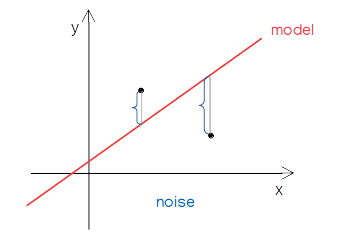

일단 데이터셋 전체의 likelihood 대신 데이터 하나의 likelihood p(yn0, xn)을 생각해보자. 출력값의 분포를 어떻게 생각할 수 있을까? 모델을 선형 모델 y = oTx로 잡았을 때, 출력값의 분포는 모델의 예측값 0Txn에다가 노이즈의 분포를 더한 값이 된다.

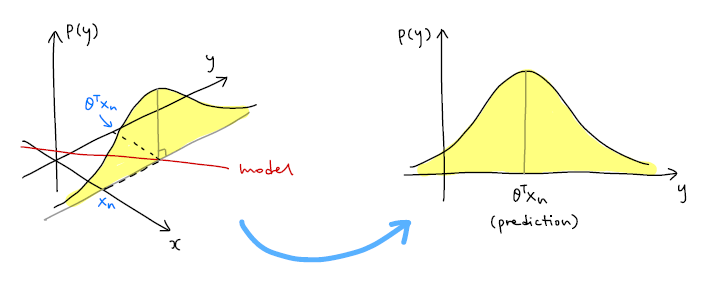

xy 평면 위에 모델에 해당하는 빨간색 직선이 있다. 출력값의 분포를 나타내기 위해서 p(y) 좌표축을 추가했다. 입력 데이터가 xn일 때, 모델의 예측값은 0Txn이고, 출력값의 분포 p(yn | 0, xn)은 노란색으로 표시한 정규분포 그래프와 같다.

# likelihood 감 잡기

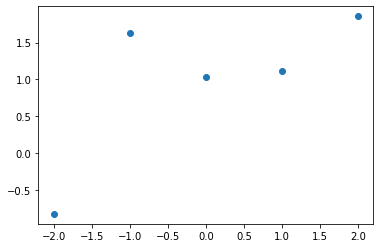

In [3]:
# 5개의 랜덤한 데이터 포인트를 생성하고 좌표평면 위에 표시

import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(321)

input_data = np.linspace(-2, 2, 5)
label = input_data + 1 + np.random.normal(0, 1, size=5)

plt.scatter(input_data, label)
plt.show()

알대 코드에서 일차함수 모델의 식을 바꾸어가며 데이터 포인트 5개의 likelihood 값이 각 각 어떻게 바뀌느 지 보자.



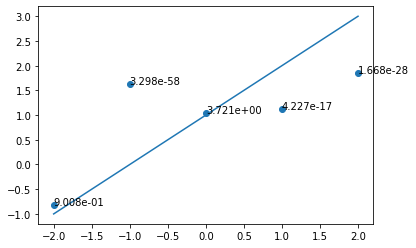

In [4]:
# 데이터 포인트 옆에 있는 숫자는 likelihood 값이고, 직선 모델이 표현하는 함수

a = 1
b = 1
# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

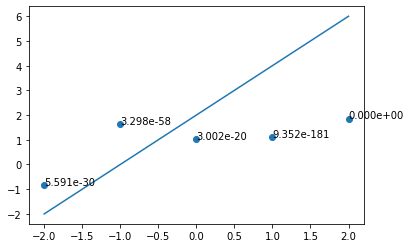

In [5]:
a = 2
b = 2
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

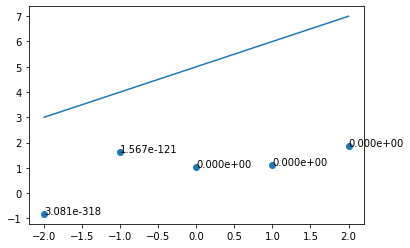

In [6]:
a = 1
b = 5
#-------------------------------#

# 모델 예측값
model_output = a*input_data + b
likelihood = []

# x: 입력데이터, y: 데이터라벨
# 예측값과 라벨의 차이를 제곱해 exp에 사용
for x, y, output in zip(input_data, label, model_output):
    likelihood.append(1/(math.sqrt(2*math.pi*0.1*0.1))*math.exp(-pow(y-output,2)/(2*0.1*0.1)))

model_x = np.linspace(-2, 2, 50)
model_y = a*model_x + b

fig, ax = plt.subplots()
ax.scatter(input_data, label)
ax.plot(model_x, model_y)

for i, text in enumerate(likelihood):
    ax.annotate('%.3e'%text, (input_data[i], label[i]))

plt.show()

### likelihood가 왜 중요한가?

위 예제에서 보셧듯이, 데이터 포인트가 모델 함수에서 멀어질 수록 데이터의 likelihood는 기하급수적으로 감소한다.

likelihood를 구하는 식을 보면 모델 예측값과 데이터 라벨의 차이를 제곱해서 exponential 위에 올려놓은 것을 확인할 수 있다. 즉, 예측값과 라벨의 차이가 조금만 벌어져도 likelihood 값은 민감하게 반응한다.

머신러닝의 목표가 데이터 포인트들을 최대한 잘 표현하는 모델을 찾는 것이라는 사실을 생각한다면, 결국 데이터 포인트들의 likelihood 값을 크게 하는 모델을 찾는 것이다.

데이터의 likelihood 값을 최대화하는 모델 파라미터를 찾는 방법이 최대 가능도 추론(maximum likelihood extimation, MLE)이다.

# MLE: 최대 가능도 추론

좋은 머신러닝 모델은 하나의 데이터에 대해서만 likelihood가 큰 모델이 아니라, 데이터 셋에 있는 모든 데이터 포인트의 likelihood 값을 크게 만드는 모델이다. 데이터 전체의 liklihood는 어떻게 구하면 좋을까?

우리가 가지고 있는 데이터 포인트 (x1, y1)....(xn, yn)은 서로 독립이고(independent) 같은 확률 분포를 따른다고(identically distributed)가정해보자.

이 조건을 independent and identically distributed, 줄여서 i.i.d.라고 부르는 데, 머신러닝 문제에서 꼭 필요한 전제조건이다. 데이터 포인트들이 서로 독립적이므로, 데이터셋 전체의 likelihood p(Y | 0, X)는 데이터 포인트 각각의 likelihood를 모두 곱한 값과 같다.

MLE를 실제로 적용할 때는 likelihood 대신 log likelihood를 최대화하는 파라미터를 구한다. 데이터 셋의 likelihood가 데이터 포인트 각각의 likelihood를 곱한 형태인데, 로그를 씌우면 곱셈 연산이 덧셈 연산으로 바뀌면서 미분 계산이 편리해진다.

또한 로그 함수는 단조 증가(monotonically increasing)하므로 likelihood를 최대화하는 파라미터와 log likelihood를 최대화하는 파라미터 값이 같아서 학습 결과에 영향을 주지 않는다.

또한 구현 측면에서 보면, 앞 스텝의 예제에서 보셨듯이 likelihood 값은 0에 가까운 수로 많이 계산된다. 이 수들을 곱하다 보면 CPU가 계산할 수 있는 범위를 넘어서는 언더플로우가 발생할 가능성이 있다. likelihood 값에 로그를 씌우면 이런 문제를 예방할 수 있다.

# MLE 최적해 구하기

### 데이터셋 생성

MLE를 이용해 최적의 파라미터를 찾아보고 데이터셋의 likelihood도 계산해 보도록 하겠다. 아래 코드는 y = x + 1 함수를 기준으로 랜덤한 노이즈를 섞여서 데이터 포인트 20개를 생성하고 시각화하는 코드다. 데이터 생성 단계에서 지정한 노이즈의 분포는 평균이 0이고, 표준편차가 0.5인 정규분포다.

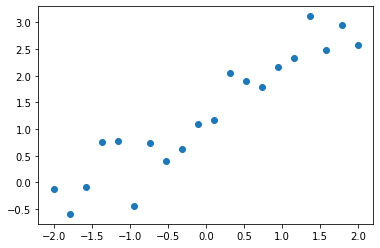

In [7]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 20

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

plt.scatter(input_data, labels)
plt.show()

### likelihood와 파라미터 생성

데이터를 생성할 때는 노이즈 분포의 표준편차를 0.5로 정했지만 데이터를 관찰하고 모델을 설계하는 입장에서는 노이즈의 원래 표준편차를 알 수 없습니다.

In [8]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

slope: 0.8578 bias: 1.2847
likelihood: 2.9724e-54
negative log likelihood: 1.2325e+02


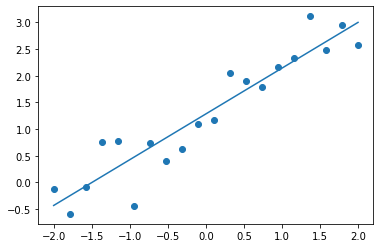

In [9]:
# X: 20x2 matrix, y: 20x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples, 1)), axis=1)
y = labels

theta_1, theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

print('slope: '+'%.4f'%theta_1+' bias: '+'%.4f'%theta_0)

predictions = theta_1 * input_data + theta_0
print('likelihood: '+'%.4e'%likelihood(labels, predictions))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, predictions))

model_x = np.linspace(-2, 2, 50)             # -2부터 2까지 숫자 50개를 점으로 찍자
model_y = theta_1 * model_x + theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, model_y)
plt.show()

# MAP: 최대 사후 확률 추정

### prior 분포의 등장

MLE의 최적해는 오로지 관측된 데이터 값에만 의존한다. 물론 이러 접근법은 계산이 비교적 간단하다는 장점이 있지만, 관측된 데이터에 노이즈가 많이 섞여 있는 경우, 이상치(outlier) 데이터가 존재하는 경우에는 모델의 안정성이 떨어진다는 단점이 있다.

MAP는 데이터셋이 주어졌을 때, 파라미터의 분포, 즉 p(0 | X)에서 확률 값을 최대화하는 파라미터 0을 찾습니다. 직관적으로 이야기하면 '이런 데이터가 있으 때 파라미터 값이 무엇일 확률이 제일 높은가?'의 문제다.

# MLE와 MAP의 비교

### 데이터셋 생성

MAP는 MLE와 비슷하지만 정규화 항에 해당하는 negative log prior 부분이 존재한다는 차이가 있었다. 그래서 MLE 모델보다 MAP 모델이 더 안정적이다.

이상치가 있는 데이터셋을 이용해서 MAP와 MLE를 비교해보자.

이전 예제와 마찬가지로 y=x+1y=x+1 함수값에 랜덤한 노이즈를 더해서 데이터 포인트들을 생성하겠습니다.

실험 결과 이상치 데이터 한 개를 데이터 포인트 20개에 추가하는 것으로는 모델에 큰 영향을 주지 못해서 데이터 포인트를 10개로 줄이고 이상치 데이터도 2개 추가합니다.

그래프에서 (0.5, 9)(0.5,9), (1.5, 10)(1.5,10) 위치의 이상치 데이터를 확인할 수 있습니다.

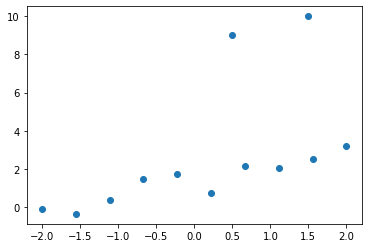

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 10

input_data = np.linspace(-2, 2, num_samples)
labels = input_data + 1 + np.random.normal(0, 0.5, size=num_samples)

input_data = np.append(input_data, [0.5, 1.5])
labels = np.append(labels, [9.0, 10.0])

plt.scatter(input_data, labels)
plt.show()

### 파라미터 계산

파라미터 분포의 표준편차를 작게 잡을수록 파라미터 값에 대한 제약 조건을 강하게 줄 수 있다.

In [11]:
def likelihood(labels, preds):
    result = 1/(np.sqrt(2*math.pi*0.1*0.1))*np.exp(-np.power(labels-preds,2)/(2*0.1*0.1))
    
    return np.prod(result)

def neg_log_likelihood(labels, preds):
    const_term = len(labels)*math.log(1/math.sqrt(2*math.pi*0.1*0.1))

    return (-1)*(const_term + 1/(2*0.1*0.1)*np.sum(-np.power(labels-preds,2)))

[MLE result] (blue)
slope: 1.4748 bias: 2.4784
likelihood: 0.0000e+00
negative log likelihood: 4.1298e+03

[MAP result] (orange)
slope: 1.1719 bias: 1.6628
likelihood: 0.0000e+00
negative log likelihood: 4.6645e+03


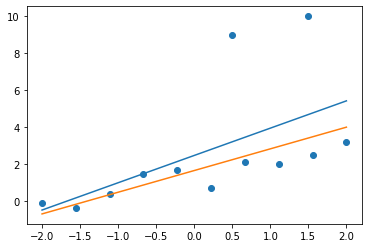

In [12]:
# X: 21x2 matrix, y: 21x1 matrix
# input_data 리스트를 column vector로 바꾼 다음 np.append 함수로 상수항을 추가합니다.
X = np.append(input_data.reshape((-1, 1)), np.ones((num_samples+2, 1)), axis=1)
y = labels

# MLE 파라미터 계산식
mle_theta_1, mle_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
# MAP 파라미터 계산식
map_theta_1, map_theta_0 = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)+(0.1*0.1)/(0.04*0.04)*np.eye(2)), X.T), y)

print('[MLE result] (blue)')
print('slope: '+'%.4f'%mle_theta_1+' bias: '+'%.4f'%mle_theta_0)

mle_preds = mle_theta_1 * input_data + mle_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, mle_preds))
print('negative log likelihood: '+'%.4e\n'%neg_log_likelihood(labels, mle_preds))

print('[MAP result] (orange)')
print('slope: '+'%.4f'%map_theta_1+' bias: '+'%.4f'%map_theta_0)

map_preds = map_theta_1 * input_data + map_theta_0
print('likelihood: '+'%.4e'%likelihood(labels, map_preds))
print('negative log likelihood: '+'%.4e'%neg_log_likelihood(labels, map_preds))

model_x = np.linspace(-2, 2, 50)
mle_model_y = mle_theta_1 * model_x + mle_theta_0
map_model_y = map_theta_1 * model_x + map_theta_0

plt.scatter(input_data, labels)
plt.plot(model_x, mle_model_y)
plt.plot(model_x, map_model_y)
plt.show()

위 그래프에서 파란색 직선과 주황색 직선은 각각 MLE, MAP를 이용해 찾은 모델을 나타낸다. 파란색 직선은 이상치 데이터까지 포함한 negative log likelihood를 감소시키기 위해 직선이 위로 치우쳐서 아래쪽 10개 데이터의 경향성에서는 약간 벗어났따. 반면 주황색 직선은 이상치 데이터가 추가되어도 아래쪽 데이터에서 크게 벗어나지는 않고 있다.

원래 데이터 분포에서 멀리 떨어진 이상치 데이터가 추가되었기 때문에, likelihood의 값은 언더플로우가 발생해서 0으로 표시됩니다.
negative log likelihood의 값을 보면 MLE 결과와 MAP 결과를 비교할 수 있습니다. MAP가 MLE에 비해 negative log likelihood 값이 크지만(likelihood가 작지만), 이상치 데이터가 추가되었을 때 모델 파라미터의 변화는 MLE보다 작습니다.